<a href="https://colab.research.google.com/github/hank199599/Machine-Learning-for-Practical-Optical-Design-data/blob/main/Regresstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import dataset

In [29]:
url = 'https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/Data.csv'

dataset =pd.read_csv(url, sep=',')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

print(dataset.shape,X.shape,Y.shape)

print(X)
print(y)

(10, 4) (10, 3) (10,)
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# scikit-learn.[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)：填補缺失數據  
```python
fit_transform(X[, y])
```
Fit to data, then transform it.  
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 nan]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 nan 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## scikit-learn.[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder)  
Encoding categorical data

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [34]:
print(X)

[[1 0.0 0.0 44.0 72000.0]
 [0 0.0 1.0 27.0 48000.0]
 [0 1.0 0.0 30.0 54000.0]
 [0 0.0 1.0 38.0 61000.0]
 [0 1.0 0.0 40.0 nan]
 [1 0.0 0.0 35.0 58000.0]
 [0 0.0 1.0 nan 52000.0]
 [1 0.0 0.0 48.0 79000.0]
 [0 1.0 0.0 50.0 83000.0]
 [1 0.0 0.0 37.0 67000.0]]


In [35]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## scikit-learn.[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder)
Encoding the Independent variable

In [36]:
from sklearn.preprocessing import OneHotEncoder

X1 = X[:, 0].reshape(-1, 1)

onehotencoder_X1 = OneHotEncoder()
X1 = onehotencoder_X1.fit_transform(X1).toarray()
onehotencoder_X1.categories_
# print(X1) ['Country']欄位修正為三欄

X = np.c_[X1, X[:, 1:]]
print(X)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 nan]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 nan 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


# 切割資料集  
 Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(y_train,y_test)

[1 1 1 0 1 0 0 1] [0 0]


In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_trin,X_test)

[[1.0 0.0 1.0 0.0 40.0 nan]
 [0.0 1.0 0.0 0.0 37.0 67000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 1.0 nan 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 35.0 58000.0]] [[ 1.         -1.          2.64575131 -0.77459667 -1.35784756 -0.82778996]
 [ 1.         -1.          2.64575131 -0.77459667  1.8641636   2.02036872]]


# 簡單線性迴歸
Simple Linear Regression

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
dataset = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X.shape, y.shape)

(30, 1) (30,)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [50]:
y_predic = regressor.predict(y_train.reshape(-1,1))
y_predic

array([5.29399688e+08, 6.17130050e+08, 6.02326077e+08, 5.71166705e+08,
       1.06370722e+09, 8.57404884e+08, 4.31856087e+08, 1.13903551e+09,
       5.62185254e+08, 3.72845806e+08, 7.60440731e+08, 8.77984649e+08,
       5.34511919e+08, 5.08866653e+08, 9.86790111e+08, 4.06808961e+08,
       3.67724230e+08, 9.18480618e+08, 6.34971454e+08, 5.32343660e+08])

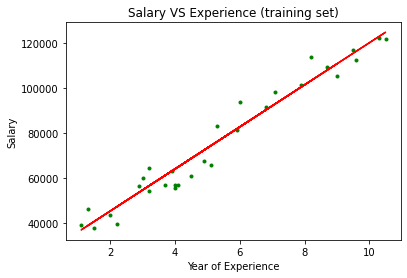

In [63]:
plt.scatter(X,y,marker=".",color='g')
plt.plot(X_train,regressor.predict(X_train),color='r')

plt.title('Salary VS Experience (training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()